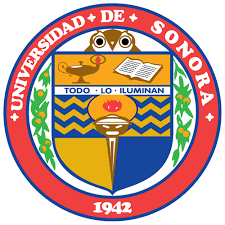



# **Evaluación 2**

*Segunda Evaluación Física Computacional 1 (2021-1)*

Iveth Rocio Navarro Lopez



---

In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
#from datetime import datetime
import math
from math import exp, sqrt, pi

### Segunda Evaluación Física Computacional 1 (2021-1)

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 



**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

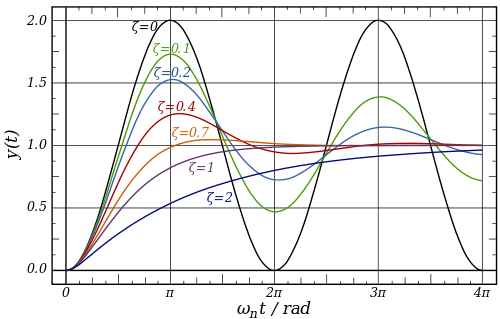

\begin{eqnarray*}
\frac{d x}{dt} & = & v = f_1(t)\\
\frac{d v}{dt} & = &  -2\zeta \omega_n v -\omega_n^2x = f_2(t)\\ 
\end{eqnarray*}

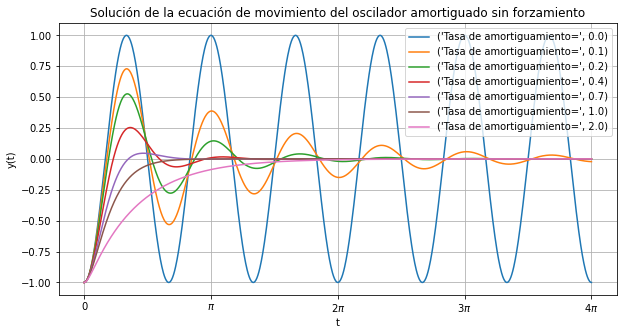

In [12]:
def E(y,t,z,w0):
  x,v = y
  dydt =  [v,-2*z*wn*v - x*wn**2]
  return dydt

y0 = [-1.0,0.0] #Condiciones iniciales

# Tiempo de integración de 0 a 4pi:

tmax = 4*np.pi
t = np.linspace(0, tmax, 1000)

abserr = 1.0e-8
relerr = 1.0e-6

plt.figure(figsize=(10,5))

k = 9
m = 1
wn = np.sqrt(k/m)

z1 = [0.0,0.1,0.2,0.4,0.7,1.0,2.0]

for z in z1:

# Método de integración scipy.integrate.odeint:

  y = odeint(E, y0, t, args=(z,wn), atol=abserr, rtol=relerr)

  plt.plot( t, y[:, 0], label=('Tasa de amortiguamiento=',z))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del oscilador amortiguado sin forzamiento')
  plt.xlabel('t')
  plt.xticks([0,np.pi,2*np.pi,3*np.pi,4*np.pi],[r'0',r'$\pi$',r'$2\pi$',r'$3\pi$',r'$4\pi$'])
  plt.ylabel('y(t)')  
  plt.grid()
plt.show()

**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

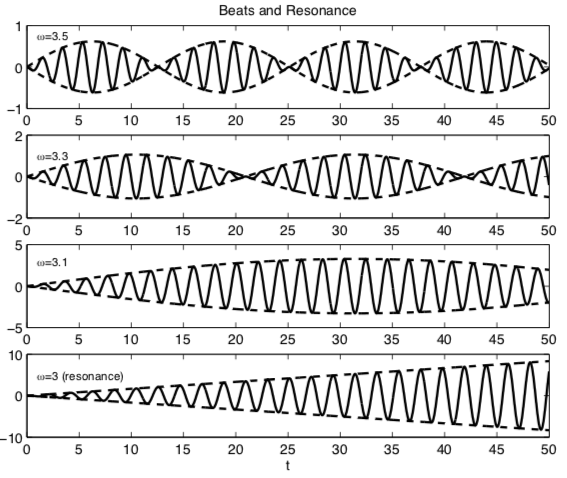

\begin{eqnarray*}
\frac{d x}{dt} & = & v = f_1(t)\\
\frac{d v}{dt} & = & \frac{1}{m } F_0 \sin(\omega t)  -\omega_n^2x = f_2(t)\\ 
\end{eqnarray*}

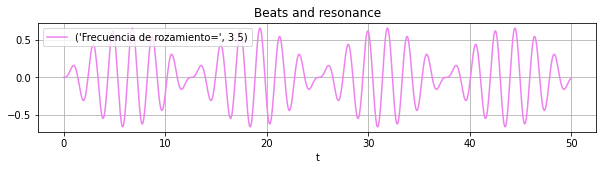

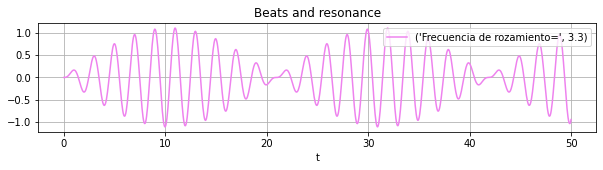

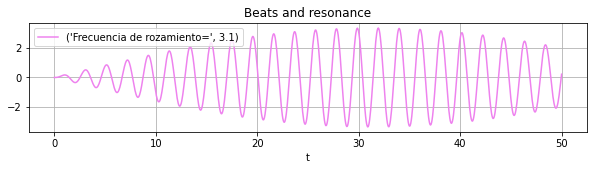

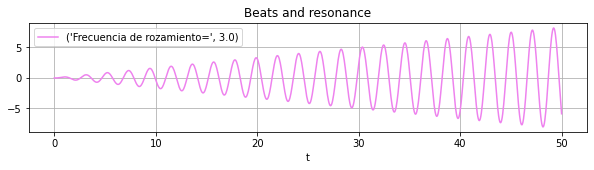

In [14]:
def E2(y,t,w,m,F0,wn):
  x,v = y
  dydt = [v,(F0/m)*np.sin(w*t)-x*wn**2]
  return dydt

y0 = [0.0,0.0] #Condiciones iniciales

# Tiempo de integración de 0s a 50s
t = np.linspace(0, 50, 1000)

abserr = 1.0e-8
relerr = 1.0e-6

k = 9
m = 1
wn = np.sqrt(k/m)
F0 = 1


w1 = [3.5,3.3,3.1,3.0]

for w in w1:

  # Método de integración scipy.integrate.odeint:

  y = odeint(E2, y0, t, args=(w,m,F0,wn), atol=abserr, rtol=relerr)

  plt.figure(figsize=(10,2))
  plt.plot( t, y[:, 0], 'violet', label=('Frecuencia de rozamiento=',w))
  plt.legend(loc='best')
  plt.title('Beats and resonance')
  plt.xlabel('t') 
  plt.grid()
  plt.show()

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 



\begin{eqnarray*}
\frac{d x}{dt} & = & v = f_1(t)\\
\frac{d v}{dt} & = & \frac{1}{m } F_0 \sin(\omega t)  -2\zeta \omega_n v -\omega_n^2x = f_2(t)\\ 
\end{eqnarray*}

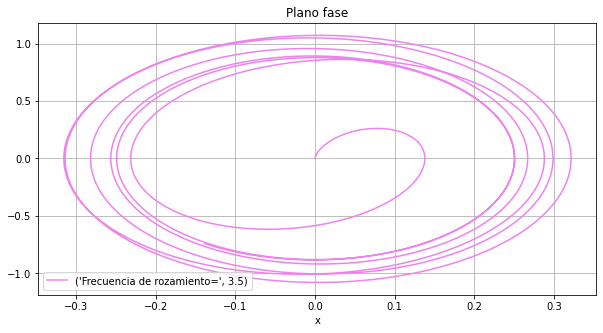

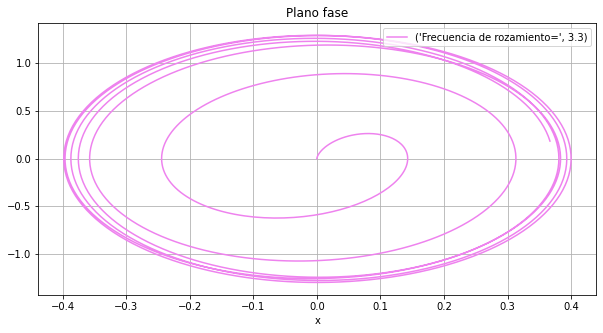

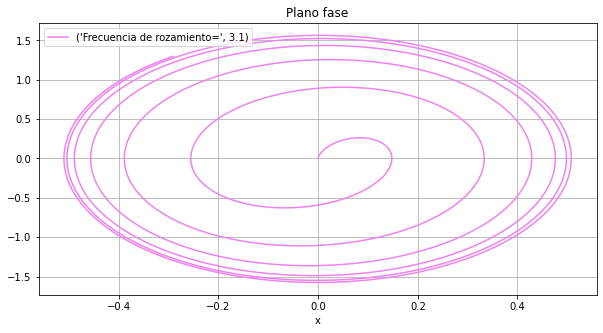

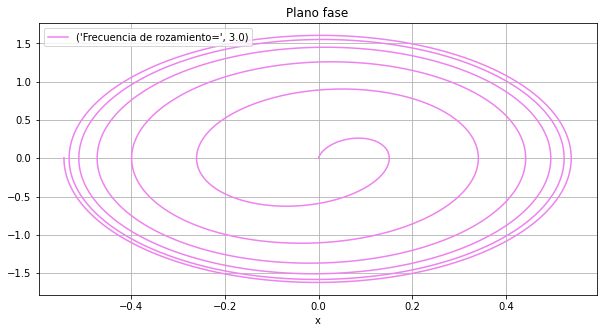

In [13]:
def E3(y,t,w,z,m,F0,wn):
  x,v = y
  dydt = [v,(F0/m)*np.sin(w*t)-2*z*wn*v-x*wn**2]
  return dydt

y0 = [0.0,0.0] #Condiciones iniciales

# Tiempo de integración de 0s a 50s:

tmax = 4*np.pi
t = np.linspace(0, tmax, 1000)

abserr = 1.0e-8
relerr = 1.0e-6

k = 9
m = 1
wn = np.sqrt(k/m)
F0 = 1
z = 0.1

w1 = [3.5,3.3,3.1,3.0]

for w in w1:

  # Método de integración scipy.integrate.odeint:

  y = odeint(E3, y0, t, args=(w,z,m,F0,wn), atol=abserr, rtol=relerr)

  
  plt.figure(figsize=(10,5))
  plt.plot( y[:,0], y[:, 1], 'violet', label=('Frecuencia de rozamiento=',w))
  plt.legend(loc='best')
  plt.title('Plano fase')
  plt.xlabel('x') 
  plt.grid()

plt.show()